In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
steps = 4

structuring_element_square = np.ones((5, 5), dtype=np.uint8)
structuring_element_circle = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
structuring_element_diagonal = np.eye(5, dtype=np.uint8)

structuring_elements = {
    "Square": np.ones((5, 5), dtype=np.uint8),
    "Circle": cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)),
    "Diagonal": np.eye(5, dtype=np.uint8)
}

In [4]:
def compute_morphological_spectrum(image_path, structuring_element):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    kernel = np.array(structuring_element, dtype=np.uint8)

    spectrum = []
    for i in range(1, steps + 1):
        opened = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel, iterations=i)
        closed = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel, iterations=i)
        spectrum.append((opened, closed))

    return spectrum

def visualize_morphological_spectrum(spectrum, structuring_element_name):
    plt.figure(figsize=(12, 6))
    for i, (opened, closed) in enumerate(spectrum, start=1):
        plt.subplot(2, 5, i)
        plt.title(f"Iteration {i}")
        plt.imshow(np.hstack([opened, closed]), cmap='gray')
        plt.axis('off')

    plt.suptitle(f"Structuring Element: {structuring_element_name}")
    plt.show()

def test(image_path):
    for structuring_element_name, structuring_element in structuring_elements.items():
        spectrum = compute_morphological_spectrum(image_path, structuring_element)
        visualize_morphological_spectrum(spectrum, structuring_element_name)

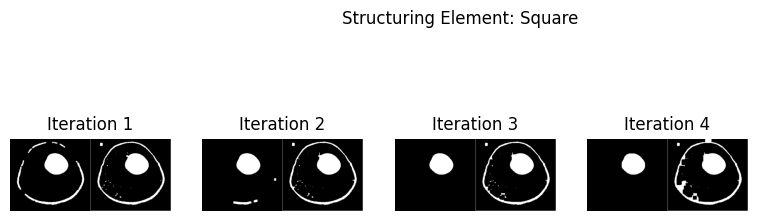

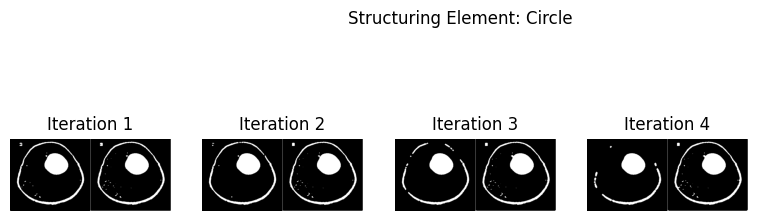

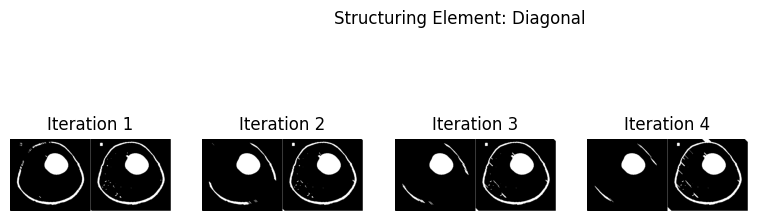

In [5]:
test("data/test1.jpeg")

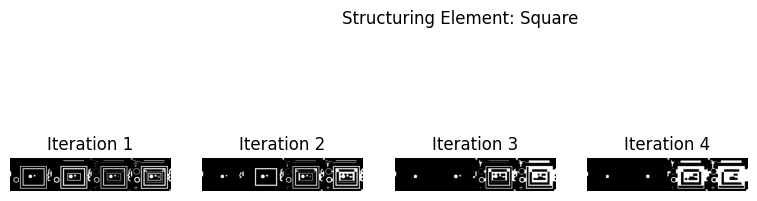

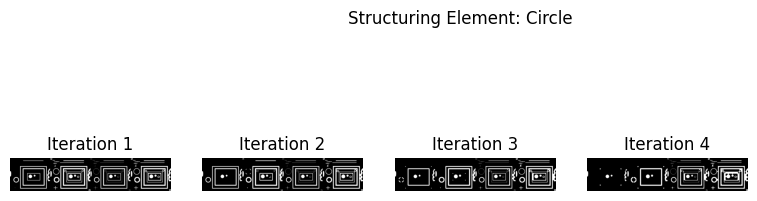

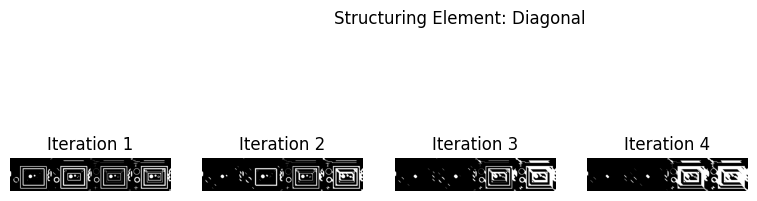

In [6]:
test("data/test2.png")

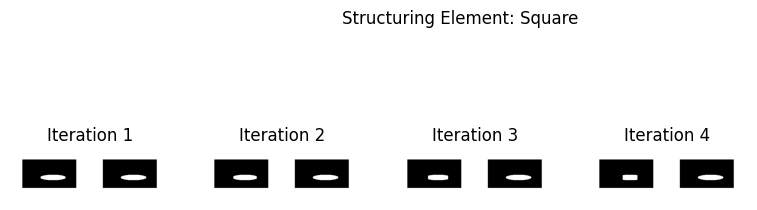

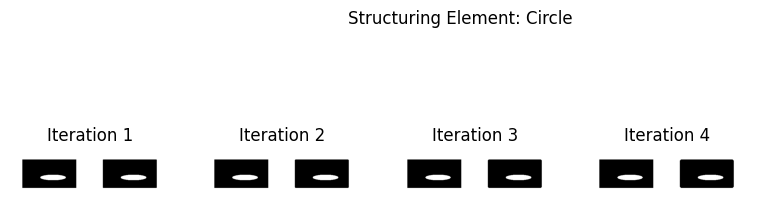

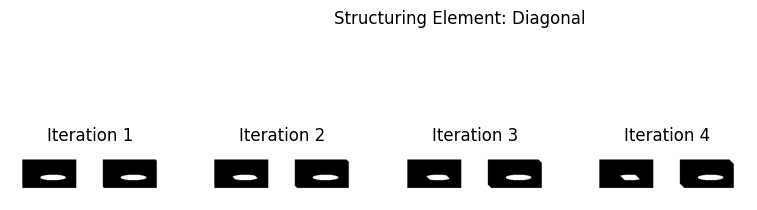

In [7]:
test("data/test3.jpg")

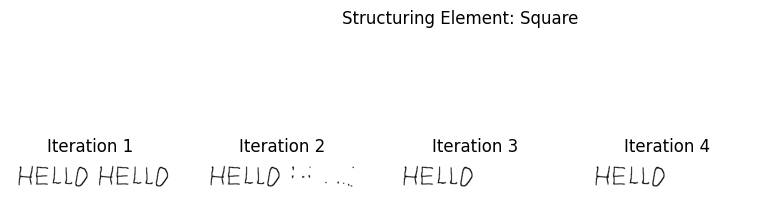

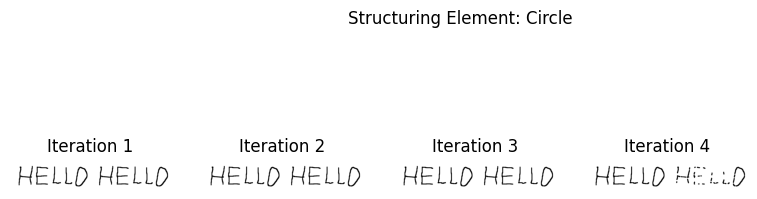

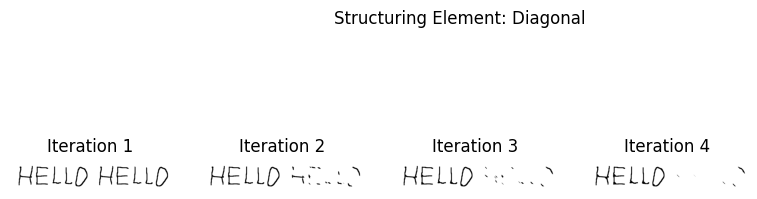

In [8]:
test("data/test4.jpg")